In [1]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize
import numpy as np
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'
print(device)

mps


In [2]:
EPOCHS=5
BATCH_SIZE=32
LEARNING_RATE=.003
df = pd.read_csv('dataset/train.csv')

y = df['target'].values

del df['target']
del df['ID_code']
X = df.values

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X,y)

(array([134898.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  15102.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

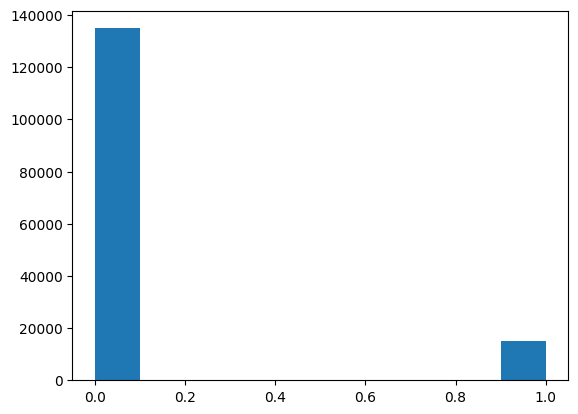

In [3]:
plt.hist(y_train)

In [4]:
print(f"y_train[:10]:{y_train[:10]}")
print(f"X_train[:10]:{X_train[:10]}")

print(f"y_test[:10]:{y_test[:10]}")
print(f"X_test[:10]:{X_test[:10]}")

y_train[:10]:[0 0 0 0 0 0 0 0 0 0]
X_train[:10]:[[ 0.04854681 -0.00849624  0.08182677 ...  0.04909309  0.05460884
  -0.00025026]
 [ 0.065986    0.02427497  0.06952132 ...  0.04920631  0.08961166
  -0.15545063]
 [ 0.08592794  0.00822055  0.07572142 ...  0.0496339   0.1111114
  -0.00618702]
 ...
 [ 0.07526229 -0.03055509  0.05430756 ...  0.04669336  0.08135884
  -0.12464366]
 [ 0.0494931   0.02098225  0.08158563 ...  0.05685056  0.10454971
  -0.05314423]
 [ 0.08161268  0.01909418  0.03263414 ...  0.06040893  0.09021432
   0.04775095]]
y_test[:10]:[1 0 0 0 0 0 0 0 0 1]
X_test[:10]:[[ 0.07557821 -0.04973809  0.07112618 ...  0.05711297  0.09477299
  -0.00348768]
 [ 0.0518955  -0.01992334  0.04194749 ...  0.04805991  0.09716992
  -0.0303703 ]
 [ 0.05139497 -0.03295939  0.06464605 ...  0.04133958  0.10531542
  -0.06594055]
 ...
 [ 0.0500989  -0.03718965  0.0686013  ...  0.05528441  0.12844258
   0.05017534]
 [ 0.07863138 -0.00668167  0.07998692 ...  0.05389254  0.07264509
  -0.14843813]
 [ 0.

In [5]:
class TransactionsDataset(torch.utils.data.Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].astype(np.float32), self.y[idx].astype(np.float32)

dataset_train = TransactionsDataset(X_train,y_train)
dataset_test = TransactionsDataset(X_test,y_test)
dataloader_train = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE)
dataloader_test = torch.utils.data.DataLoader(dataset_test,batch_size=BATCH_SIZE)

In [6]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear_0 = torch.nn.Linear(200,1024)
        self.batch_norm_0 = torch.nn.BatchNorm1d(1024)
        self.relu_0 = torch.nn.ReLU(1024)
        self.linear_1 = torch.nn.Linear(1024,2048)
        self.batch_norm_1 = torch.nn.BatchNorm1d(2048)
        self.relu_1 = torch.nn.ReLU(2048)
        self.linear_2 = torch.nn.Linear(2048,1024)
        self.batch_norm_2 = torch.nn.BatchNorm1d(1024)
        self.relu_2 = torch.nn.ReLU(1024)
        self.dr_2 = torch.nn.Dropout1d(.2)
        self.linear_3 = torch.nn.Linear(1024,512)
        self.batch_norm_3 = torch.nn.BatchNorm1d(512)
        self.relu_3 = torch.nn.ReLU(512)
        self.linear_4 = torch.nn.Linear(512,256)
        self.batch_norm_4 = torch.nn.BatchNorm1d(256)
        self.relu_4 = torch.nn.ReLU(256)
        self.linear_5 = torch.nn.Linear(256,128)
        self.batch_norm_5 = torch.nn.BatchNorm1d(128)
        self.relu_5 = torch.nn.ReLU(128)
        self.dr_5 = torch.nn.Dropout1d(.2)
        self.linear_6 = torch.nn.Linear(128,64)
        self.batch_norm_6 = torch.nn.BatchNorm1d(64)
        self.relu_6 = torch.nn.ReLU(64)
        self.linear_7 = torch.nn.Linear(64,16)
        self.relu_7 = torch.nn.ReLU(16)
        self.batch_norm_7 = torch.nn.BatchNorm1d(16)
        self.linear_8 = torch.nn.Linear(16,1)
        self.relu_8 = torch.nn.ReLU(1)
    
    def forward(self,x):
        x = self.linear_0(x)
        x = self.batch_norm_0(x)
        x = self.relu_0(x)
        x = self.linear_1(x)
        x = self.batch_norm_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.batch_norm_2(x)
        x = self.relu_2(x)
        x = self.dr_2(x)
        x = self.linear_3(x)
        x = self.batch_norm_3(x)
        x = self.relu_3(x)
        x = self.linear_4(x)
        x = self.batch_norm_4(x)
        x = self.relu_5(x)
        x = self.dr_5(x)
        x = self.linear_5(x)
        x = self.batch_norm_5(x)
        x = self.relu_6(x)
        x = self.linear_6(x)
        x = self.batch_norm_6(x)
        x = self.relu_7(x)
        x = self.linear_7(x)
        x = self.batch_norm_7(x)
        x = self.relu_8(x)
        x = self.linear_8(x)
        return x
    

model = Model()
model.to(device)
checkpoint = None
# we need to add some weight to the success values because the labels are very unbalanced
loss = torch.nn.BCEWithLogitsLoss(pos_weight=torch.Tensor([17.0/18.0]))
loss.to(device)
min_loss = None
optimizer = torch.optim.Adam(model.parameters(),lr=LEARNING_RATE)

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer, min_loss, checkpoint):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        y = y.unsqueeze(1)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    if not min_loss:
        min_loss = loss
        checkpoint = model
    if loss.item() < min_loss.item():
        min_loss = loss
        checkpoint = model
    print(f"Checkpoint loss:{min_loss:>7f}")
    return model, optimizer, min_loss, checkpoint

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    preds = []
    targets = []
    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            y = y.unsqueeze(1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred = torch.sigmoid(pred)
            pred = torch.round(pred)
            correct += (pred == y).sum().item()
            preds.extend(pred.cpu().numpy())
            targets.extend(y.cpu().numpy())
    print(classification_report(targets,preds))
            

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
for i in range(EPOCHS):
    model, optimizer, min_loss, checkpoint = train_loop(dataloader_train, model, loss, optimizer, min_loss, checkpoint)
    test_loop(dataloader_test, model, loss)

loss: 0.549609  [   32/150000]
loss: 0.684593  [ 3232/150000]
loss: 0.169046  [ 6432/150000]
loss: 0.360723  [ 9632/150000]
loss: 0.387753  [12832/150000]
loss: 0.302044  [16032/150000]
loss: 0.304138  [19232/150000]
loss: 0.313504  [22432/150000]
loss: 0.225842  [25632/150000]
loss: 0.205079  [28832/150000]
loss: 0.330772  [32032/150000]
loss: 0.346080  [35232/150000]
loss: 0.502486  [38432/150000]
loss: 0.331379  [41632/150000]
loss: 0.166365  [44832/150000]
loss: 0.367918  [48032/150000]
loss: 0.150323  [51232/150000]
loss: 0.183928  [54432/150000]
loss: 0.184389  [57632/150000]
loss: 0.176331  [60832/150000]
loss: 0.223438  [64032/150000]
loss: 0.327611  [67232/150000]
loss: 0.187701  [70432/150000]
loss: 0.602486  [73632/150000]
loss: 0.287441  [76832/150000]
loss: 0.175462  [80032/150000]
loss: 0.193282  [83232/150000]
loss: 0.421393  [86432/150000]
loss: 0.507346  [89632/150000]
loss: 0.161576  [92832/150000]
loss: 0.382286  [96032/150000]
loss: 0.266609  [99232/150000]
loss: 0.

In [9]:
print(f"Final checkpoint model loss: {min_loss.item()}")

Final checkpoint model loss: 0.18218375742435455


In [ ]:
# Recall is less than ideal, but given this dataset is fairly imbalanced toward 0 for the label.